<a href="https://colab.research.google.com/github/vicensi/Deep-learning/blob/main/Exemplo_CNN_Dataset_Mnist_Visualiza%C3%A7%C3%A3o_Feature_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 12.9 MB/s eta 0:00:00


In [ ]:
import visualkeras

from keras.datasets import mnist
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np

 Carrega os dados do dataset MNIST

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Plota 4 imagens de exemplo em escala de cinza

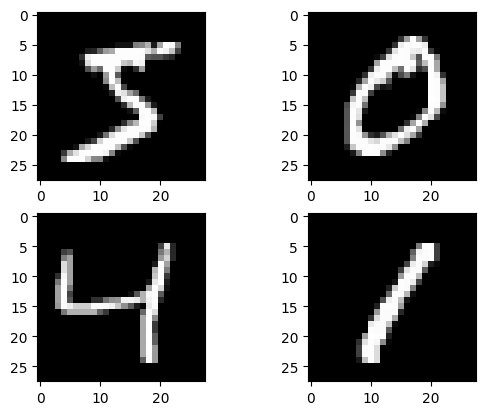

In [ ]:
plt.figure(0)
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
#Mostra o as imagens
plt.show()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
print(y_train[0])
print(y_train[1])
print(y_train[2])
print(y_train[3])

5
0
4
1


Apenas ajusta a matriz para as dimensões esperadas do TensorFlow

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(input_shape)
# Normaliza as entradas de 0-255 para 0-1
X_train = X_train / 255
X_test = X_test / 255


(28, 28, 1)


In [ ]:
# Gera os vetores com as classes do conjunto de dados de treinamento e teste
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
print(y_train[0])
print(y_train[1])
print(y_train[2])
print(y_train[3])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


Cria o modelo da rede neural Convolucional

In [ ]:
# Cria o modelo
model = Sequential()
#Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros)

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
#model.add(Conv2D(10, (3, 3), input_shape=(64, 64, 3), activation='relu'))#
#model.add(Conv2D(10, (3, 3), activation='relu'))#

print( model.output_shape)
#Camada de Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
print( model.output_shape)
#Convolução 2D com função de ativação Rectified Linear Units 64 kernels/Pesos (filtros)
model.add(Conv2D(64, (5, 5), activation='relu'))
#model.add(Conv2D(10, (3, 3), activation='relu'))#
#model.add(Conv2D(10, (3, 3), activation='relu'))#
print( model.output_shape)
#Camada de Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
print( model.output_shape)
#Remove 20% das ativações de entrada aleatoriamente
model.add(Dropout(0.2))
#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())
print( model.output_shape)

model.add(Dense(32, activation='relu'))
print( model.output_shape)
model.add(Dense(16, activation='relu'))
print( model.output_shape)
#Função de Ativação Softmax
model.add(Dense(num_classes, activation='softmax'))
print( model.output_shape)

(None, 24, 24, 32)
(None, 12, 12, 32)
(None, 8, 8, 64)
(None, 4, 4, 64)
(None, 1024)
(None, 32)
(None, 16)
(None, 10)


Compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
mais informações em https://keras.io/losses/
mais informações em https://keras.io/optimizers/
mais informações em https://keras.io/metrics/

![Função Softma](https://telescopeinstorage.blob.core.windows.net/datasets/funcaosoftmax.png)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Visualizando o Modelo

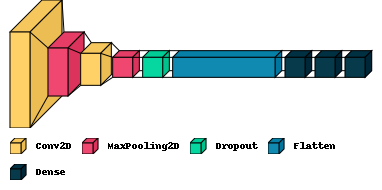

In [ ]:
visualkeras.layered_view(model, legend=True)

Treinamento do modelo com **conjunto de validação**

![Conjunto de Treinamento, Validação e Teste](https://telescopeinstorage.blob.core.windows.net/datasets/validation-set-768x242.jpeg)

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs=20, batch_size=500)

Epoch 1/20
96/96 [==============================] - 8s 14ms/step - loss: 0.9453 - accuracy: 0.6761 - val_loss: 0.1869 - val_accuracy: 0.9445
Epoch 2/20
96/96 [==============================] - 1s 10ms/step - loss: 0.1739 - accuracy: 0.9489 - val_loss: 0.1068 - val_accuracy: 0.9682
Epoch 3/20
96/96 [==============================] - 1s 11ms/step - loss: 0.1128 - accuracy: 0.9655 - val_loss: 0.0906 - val_accuracy: 0.9730
Epoch 4/20
96/96 [==============================] - 1s 11ms/step - loss: 0.0841 - accuracy: 0.9748 - val_loss: 0.0626 - val_accuracy: 0.9813
Epoch 5/20
96/96 [==============================] - 1s 11ms/step - loss: 0.0660 - accuracy: 0.9798 - val_loss: 0.0546 - val_accuracy: 0.9833
Epoch 6/20
96/96 [==============================] - 1s 11ms/step - loss: 0.0571 - accuracy: 0.9825 - val_loss: 0.0503 - val_accuracy: 0.9853
Epoch 7/20
96/96 [==============================] - 1s 12ms/step - loss: 0.0516 - accuracy: 0.9839 - val_loss: 0.0469 - val_accuracy: 0.9857
Epoch 8/20
96

Plotagem da acurácia de Treinamento e Validação

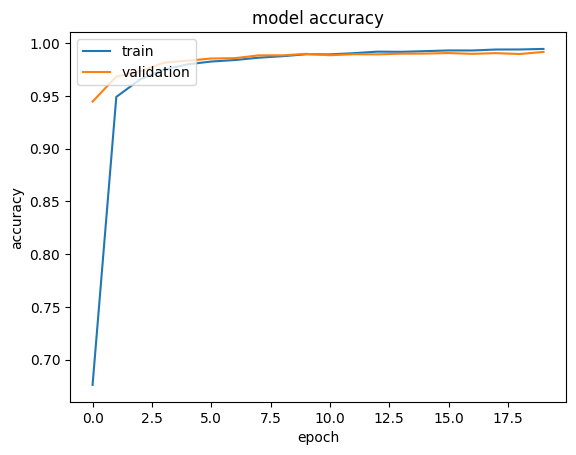

In [ ]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Avaliação final do modelo no conjunto de testes

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

Erro da CNN: 0.74%
Acurária da CNN: 99.26%


In [ ]:
scores

[0.022852372378110886, 0.9926000237464905]

Salva o modelo

In [ ]:
model.save('MNIST.hdf5', )

In [ ]:
model_loaded  = load_model('MNIST.hdf5')

#Visualização dos Outputs das Camadas Convolucionais - Feature Maps

In [ ]:
from keras import Model

In [ ]:
def visualize_feature_maps(layer_index, sample_index):
  #Cria um novo modelo usando a camada de entrada da rede e saída a partir do índice forncedido
  feat_model = Model(inputs=model_loaded.inputs, outputs=model_loaded.layers[layer_index].output)\

  sample = X_test[sample_index]
  print(sample.shape)

  sample = np.expand_dims(sample, axis=0)
  print(sample.shape)

  intermeditade_pred = feat_model.predict(sample)
  print(intermeditade_pred.shape)

  fig = plt.figure(figsize=(20, 8))
  lines = int(intermeditade_pred.shape[3]/8)

  for i in range(intermeditade_pred.shape[3]):
      ax = fig.add_subplot(lines, 8, i + 1)
      ax.imshow(intermeditade_pred[0,:,:,i]) #, cmap = plt.get_cmap('gray')

  print(intermeditade_pred[0,:,:,0])

(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 88ms/step
(1, 24, 24, 32)


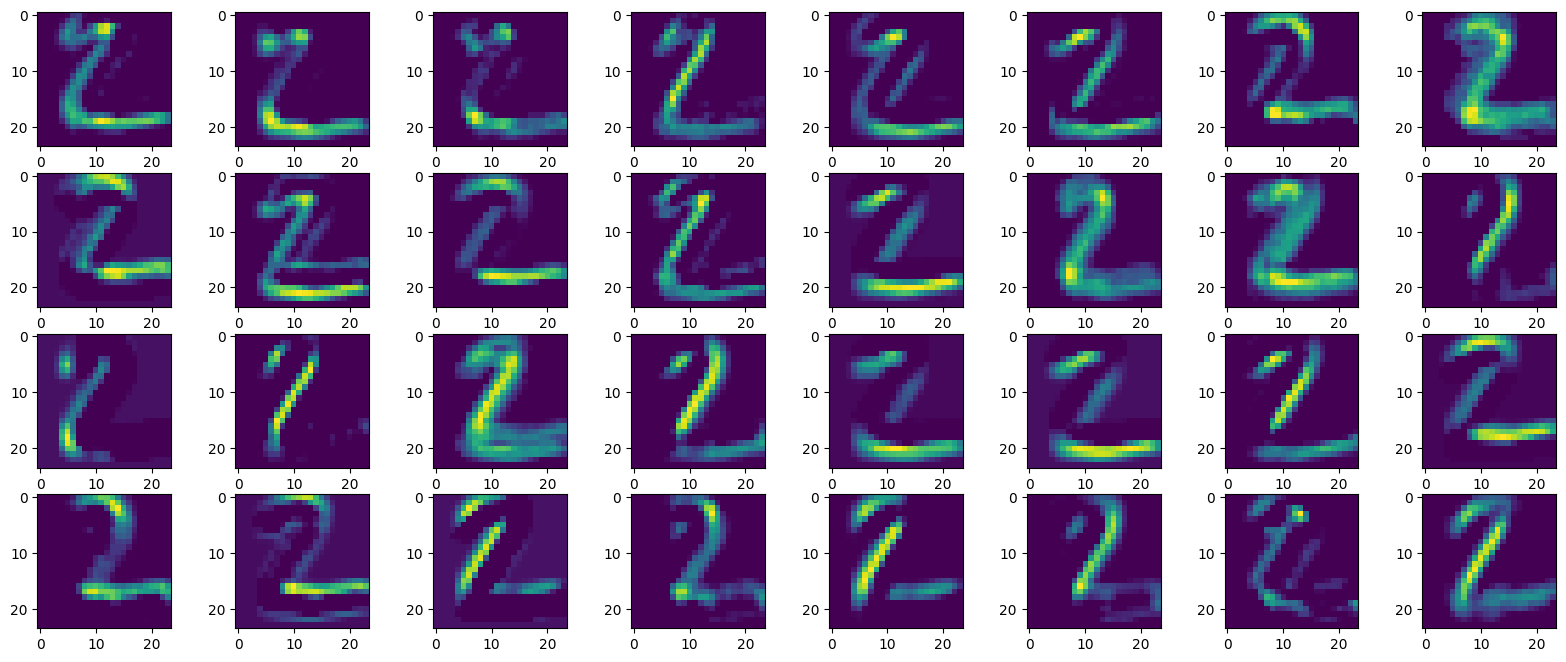

In [ ]:
# model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
visualize_feature_maps(0,1)

(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 69ms/step
(1, 12, 12, 32)


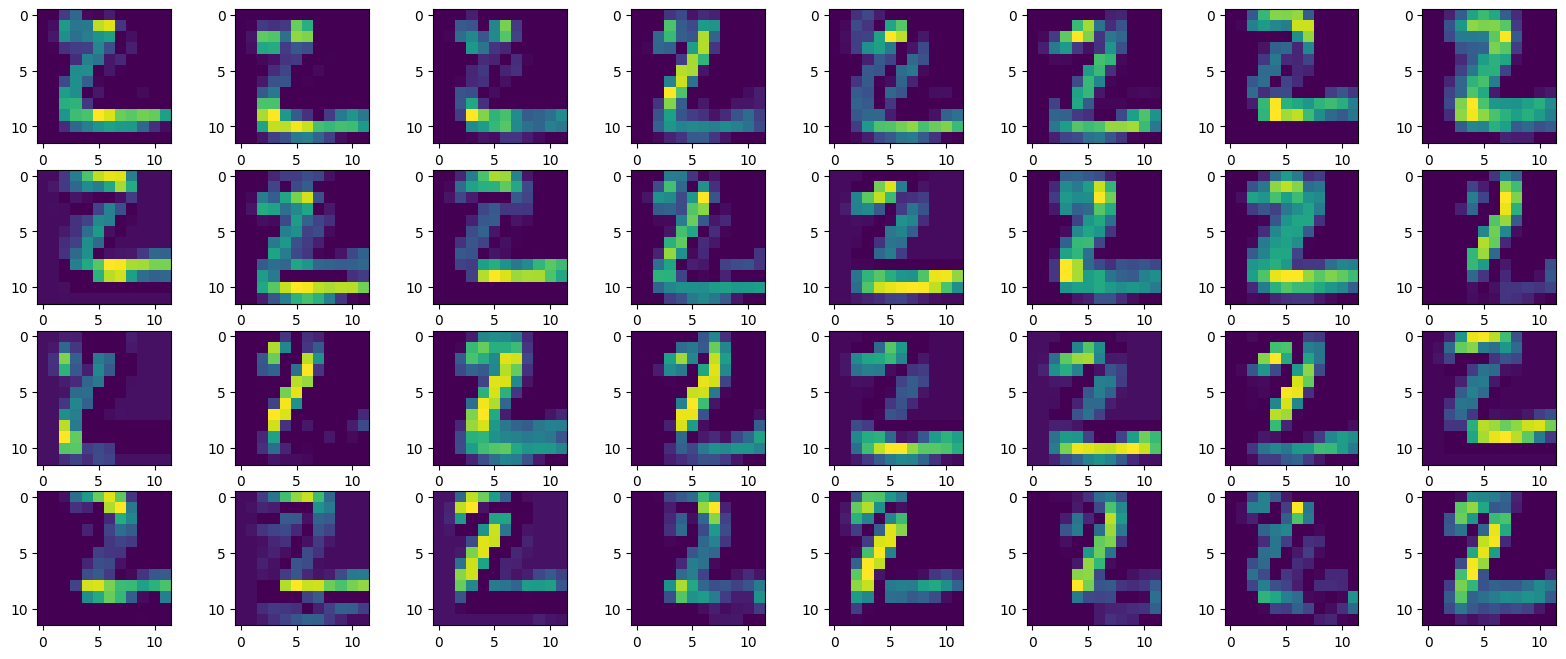

In [ ]:
# model.add(MaxPooling2D(pool_size=(2, 2)))
visualize_feature_maps(1,1)

(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 147ms/step
(1, 8, 8, 64)


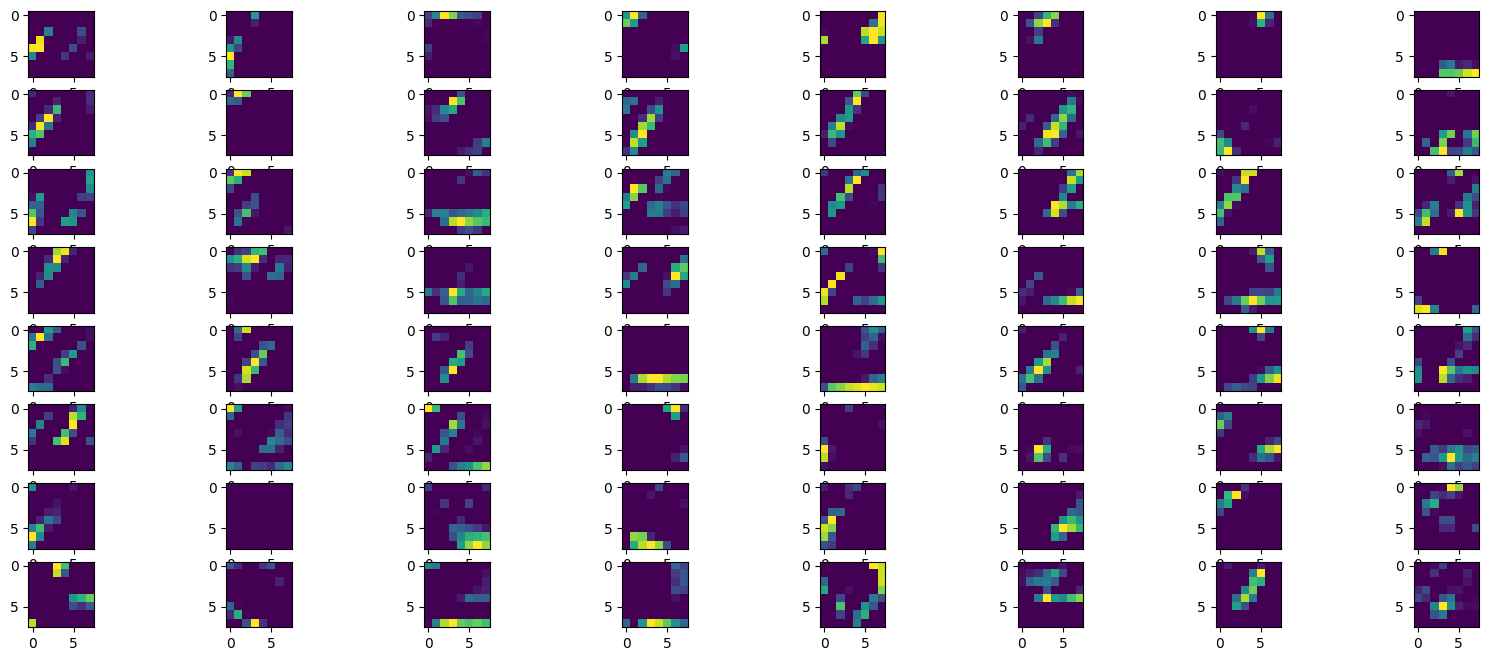

In [ ]:
# model.add(Conv2D(64, (5, 5), activation='relu'))
visualize_feature_maps(2,1)

(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 72ms/step
(1, 4, 4, 64)
[[0.         0.         0.         0.01655615]
 [1.8885273  0.85747117 0.         0.45161226]
 [1.9629532  0.         0.47010273 0.1562132 ]
 [0.         0.         0.         0.        ]]


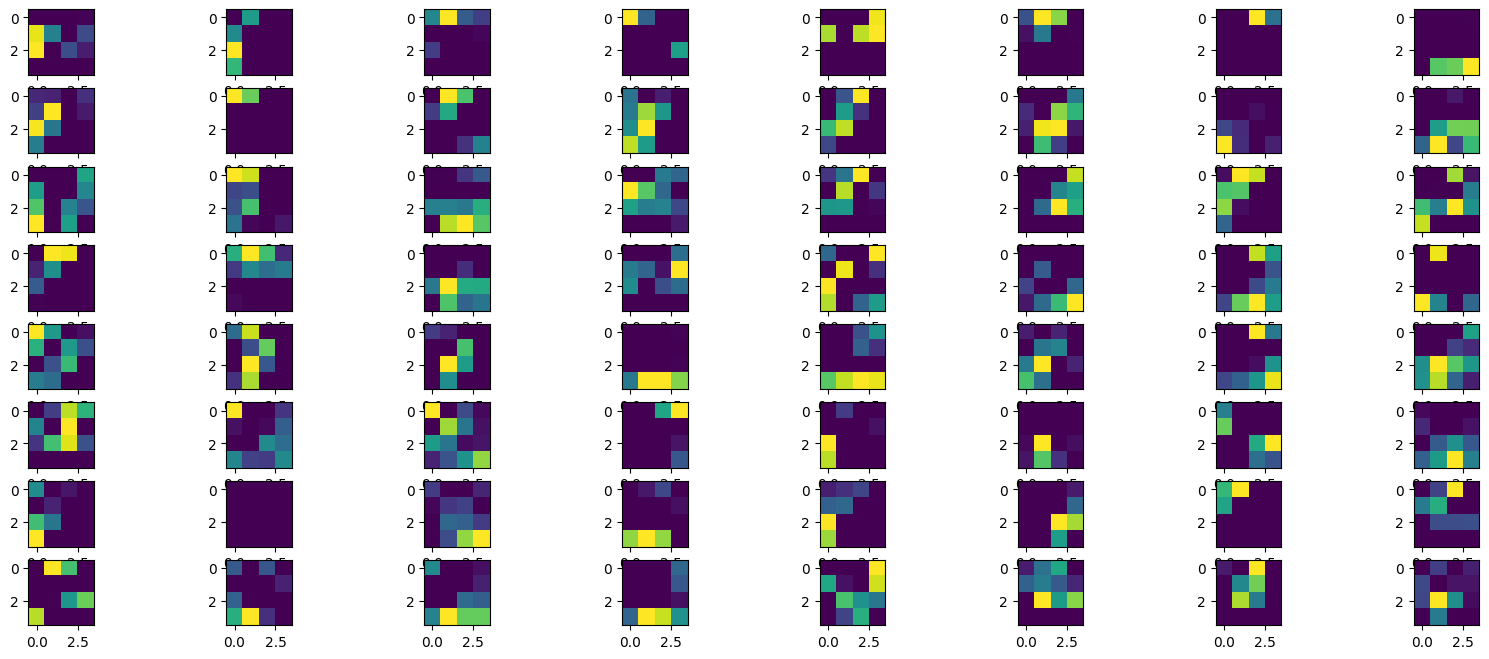

In [ ]:
# model.add(MaxPooling2D(pool_size=(2, 2)))
visualize_feature_maps(3,1)